In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bax-hybrid-cnn-lstm/df_bax_cleaned_till_outliers.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 59, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,243 (90.79 KB)

 Trainable params: 23,243 (90.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1755044793.117548      97 service.cc:148] XLA service 0x39b90da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755044793.118192      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755044793.466456      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


33/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287

I0000 00:00:1755044795.087418      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0152 - val_loss: 0.0044
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6232e-04 - val_loss: 0.0022
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6518e-04 - val_loss: 8.4084e-04
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5158e-04 - val_loss: 4.5418e-04
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3460e-04 - val_loss: 4.5309e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1440e-04 - val_loss: 0.0014
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2868e-04 - val_loss: 3.3385e-04
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9742e-04 - val_loss: 3.6703e-04
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8023e-04 - val_loss: 7.3187e-04
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3720e-04 - val_loss: 3.3187e-04
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2601e-04 - val_loss: 0.0020
Epoch 12/50
90/9

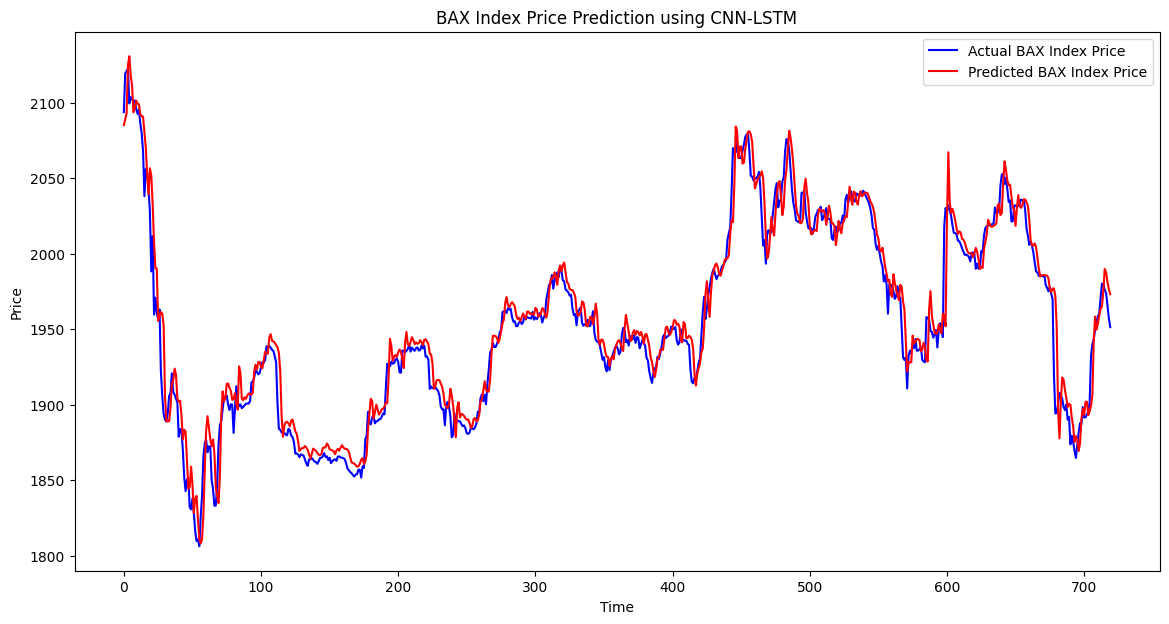

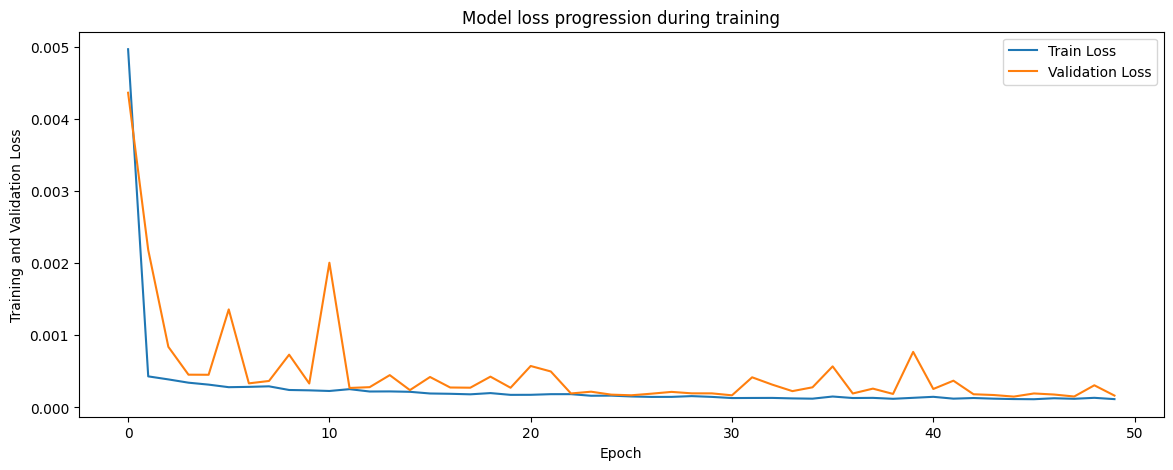

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# --- 1. Load and Prepare the Data ---

# Load your dataset
# Make sure the path is correct for your Kaggle environment.
df = pd.read_csv('/kaggle/input/bax-hybrid-cnn-lstm/df_bax_cleaned_till_outliers.csv')

# We'll assume the relevant columns are 'Date' and 'Price'.
# If your column names are different, please change them below.
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use the 'Price' column for forecasting.
price_data = df['Price'].values.reshape(-1, 1)


# --- 2. Scale the Data ---

# Scale the data to be between 0 and 1.
# This is important for neural networks to perform well.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_data)


# --- 3. Create Time Series Sequences ---

# This function will convert our data into sequences of a fixed length.
# For each sequence, the last value is the target (y) and the rest is the input (X).
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        # The input sequence is the data from i to i + time_steps
        X.append(data[i:(i + time_steps), 0])
        # The output is the single data point at i + time_steps
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# We will use the last 60 days of data to predict the next day's price.
# You can experiment with this `time_steps` value.
TIME_STEPS = 60
X, y = create_sequences(scaled_data, TIME_STEPS)


# --- 4. Split Data into Training and Testing Sets ---

# We will use the first 80% of the data for training and the remaining 20% for testing.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data to be [samples, timesteps, features] for the CNN layer.
# The CNN layer expects a 3D tensor.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# --- 5. Build the Hybrid CNN-LSTM Model ---

model = Sequential()

# Add the 1D CNN layer to extract features from the sequences.
# - filters: Number of output filters in the convolution.
# - kernel_size: The length of the 1D convolution window.
# - activation: Activation function.
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TIME_STEPS, 1)))

# Add a MaxPooling layer to reduce the dimensionality.
model.add(MaxPooling1D(pool_size=2))

# The Flatten layer is needed to transition from the CNN output to the LSTM input.
# model.add(Flatten())

# Reshape the output of Flatten to be suitable for the LSTM layer.
# The LSTM layer expects a 3D tensor: [samples, timesteps, features].
# After Flatten, we have a 2D tensor. We need to add a timestep dimension.
# We can do this with a Reshape layer (not strictly needed here as LSTM can handle it,
# but it's good practice when stacking layers like this).
# We will skip adding an explicit reshape and let Keras handle it.

# Add the LSTM layer to understand the temporal dependencies.
# - 50 units in the LSTM layer.
# - return_sequences=True is needed if you stack another LSTM layer, but not here.
model.add(LSTM(50, activation='relu')) # We removed the reshape for simplicity, Keras can infer the shape.

# Add the final Dense layer for the output prediction.
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model's architecture
model.summary()


# --- 6. Train the Model ---

# Train the model on the training data.
# - epochs: Number of times to iterate over the entire dataset.
# - batch_size: Number of samples per gradient update.
# - validation_data: Data on which to evaluate the loss at the end of each epoch.
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


# --- 7. Make Predictions and Evaluate ---

# Make predictions on the test set.
predicted_scaled = model.predict(X_test)

# Invert the scaling to get the actual price predictions.
predicted_price = scaler.inverse_transform(predicted_scaled)
actual_price = scaler.inverse_transform(y_test.reshape(-1, 1))


# --- ADD THIS PART FOR RMSE ---
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error
mse = mean_squared_error(actual_price, predicted_price)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


# --- 8. Visualize the Results ---

plt.figure(figsize=(14, 7))
plt.plot(actual_price, color='blue', label='Actual BAX Index Price')
plt.plot(predicted_price, color='red', label='Predicted BAX Index Price')
plt.title('BAX Index Price Prediction using CNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# You can also plot the training loss
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend()
plt.show()